In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("energydata_complete.csv")

In [3]:
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


#### Data Attributes
Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [4]:
 column_names = {"T1" : "Temperature_kitchen_Celsius",
 "RH_1":"Humidity_kitchen_%",
 "T2":"Temperature_living_room_Celsius",
 "RH_2":"Humidity_living_room_%",
 "T3":"Temperature_in_laundry_room_Celsius",
 "RH_3":"Humidity_laundry_room_%",
 "T4":"Temperature_office_room_Celsius",
 "RH_4":"Humidity_office_room_%",
 "T5":"Temperature_in_bathroom_room_Celsius",
 "RH_5":"Humidity_bathroom_room_%",
 "T6":"Temperature_outside_north_Celsius",
 "RH_6":"Humidity_outside_north_%",
 "T7":"Temperature_in_ironing_room_Celsius",
 "RH_7":"Humidity_ironing_room_%",
 "T8":"Temperature_teenager_room_Celsius",
 "RH_8":"Humidity_teenager_room_%",
 "T9":"Temperature_in_parents_room_Celsius",
 "RH_9":"Humidity_parents_room_%",
 "T_out":"Temperature_outside_station_Celsius",
 "RH_out":"Humidity_outside_station_%"}
    
df = df.rename(columns=column_names)

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

<AxesSubplot:xlabel='Temperature_living_room_Celsius', ylabel='Temperature_outside_north_Celsius'>

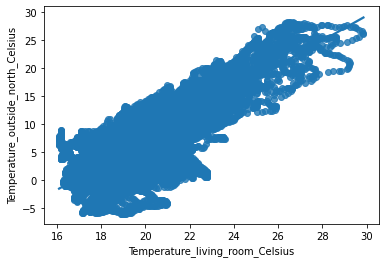

In [5]:
#select a sample of the dataset
simple_linear_reg_df = df[['Temperature_outside_north_Celsius', 'Temperature_living_room_Celsius']]
#regression plot
sns.regplot(x="Temperature_living_room_Celsius", y="Temperature_outside_north_Celsius",
data=simple_linear_reg_df)

In [7]:
x = df.Temperature_living_room_Celsius
y = df.Temperature_outside_north_Celsius

In [8]:
from scipy import stats
(stats.pearsonr(x,y)[0])**2

0.6418990830855491

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
df = df.drop(["date", "lights"], axis="columns")
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=["Appliances"])
heating_target = normalised_df['Appliances']
#Now, we split our dataset into the training and testing dataset. Recall that we

x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=42)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


In [10]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.05

What is the Residual Sum of Squares (in two decimal places)?

In [11]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

What is the Root Mean Squared Error (in three decimal places)?

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

What is the Coefficient of Determination (in two decimal places)?

In [13]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) #prints 0.893

0.15

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [14]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

In [15]:
linear_model_weights

,Features,Linear_Model_Weight
0,Humidity_living_room_%,-0.456698
1,Temperature_outside_station_Celsius,-0.321860
2,Temperature_living_room_Celsius,-0.236178
3,Temperature_in_parents_room_Celsius,-0.189941
4,Humidity_teenager_room_%,-0.157595
5,Humidity_outside_station_%,-0.077671
6,Humidity_ironing_room_%,-0.044614
7,Humidity_parents_room_%,-0.039800
8,Temperature_in_bathroom_room_Celsius,-0.015657
9,Temperature_kitchen_Celsius,-0.003281


Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [17]:
predicted_values2 = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values2))
round(rmse, 3)

0.088

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [19]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [20]:
(lasso_weights_df !=0).sum()

Features        26
Lasso_weight     4
dtype: int64

What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [21]:
predicted_values3 = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values3))
round(rmse, 3)

0.094